In [1]:
import os
import numpy as np
import pylick.io as io
import pylick.plot as plt
import matplotlib.pyplot as mpl
from pylick.analysis import Catalog, Galaxy

path = os.path.dirname(io.__file__)
io._dir_build(path, dir_name='/../examples/data/LEGAC/')
os.chdir(path+'/../examples/data/LEGAC/')


Folder /../examples/data/LEGAC/ created



FileNotFoundError: [Errno 2] No such file or directory: '/home/nic/software/pylick/pylick//../examples/data/LEGAC//'

In [ ]:
# Download LEGA-C (van de Wel et al. 2021) spectrum from the ESO archive

# # ID M10_213772
os.system('wget https://dataportal.eso.org/dataportal_new/file/ADP.2021-07-29T07:33:58.941')
os.system('mv ADP.2021-07-29T07:33:58.941 ./legac_M10_213772_v3.0.fits')
z = 0.6999

# ID M11_217260
# os.system('wget https://dataportal.eso.org/dataportal_new/file/ADP.2021-07-29T07:33:59.128')
# os.system('mv ADP.2021-07-29T07:33:59.128 ./legac_M11_217260_v3.0.fits')
# z = 0.6987

--2022-05-30 12:46:44--  https://dataportal.eso.org/dataportal_new/file/ADP.2021-07-29T07:33:58.941
Resolving dataportal.eso.org (dataportal.eso.org)... 134.171.46.235
Connecting to dataportal.eso.org (dataportal.eso.org)|134.171.46.235|:443... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified [application/octet-stream]
Saving to: ‘ADP.2021-07-29T07:33:58.941’

     0K .......... .......... .......... .......... ..........  770K
    50K .......... .......... .......... .......... .......... 1.10M
   100K .......... .......... .......... .......... .......... 2.15M
   150K .                                                      3576G=0.1s

2022-05-30 12:46:44 (1.12 MB/s) - ‘ADP.2021-07-29T07:33:58.941’ saved [155520]



In [ ]:
# Load the fits spectrum and mask side regions where flux=0
filename = 'legac_M10_213772_v3.0.fits'
# filename = 'legac_M11_217260_v3.0.fits'

colnames = ['wave', 'flux', 'err', 'qual']
spec_raw = io.load_spec_fits(dir_spec='', filename=filename, colnames=colnames, reduce_window=False, hdul=1)

# Mask bad pixels (and ferr==0 pixels)
spec_raw[3] = np.logical_or(spec_raw[3]==1,spec_raw[2]==0)
wave, flux, ferr = [spec_raw[i][spec_raw[3]==0] for i in [0,1,2]]


# Quick look
io.spec_stats(wave, flux, ferr)

     lambda_range: 6.758e+03 - 9.240e+03
delta_lambda_mean: 0.602
       flux_range: 5.286e+01 - 1.800e+02
        flux_mean: 1.317e+02
      flux_median: 1.410e+02
       ferr_range: 2.593e+00 - 1.518e+01
        ferr_mean: 3.629e+00
      ferr_median: 3.063e+00


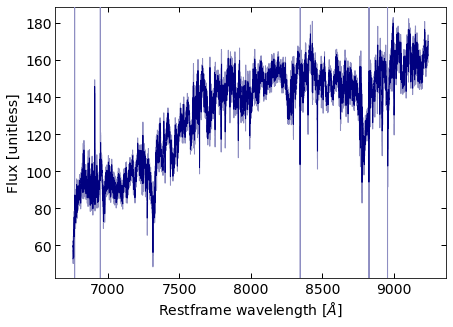

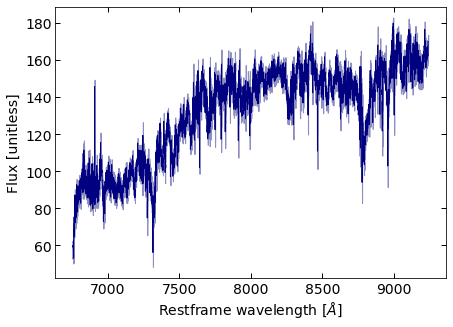

In [ ]:
# Simple plot of the spectrum 
plt.plot_spec(spec_raw[0], spec_raw[1], spec_raw[2], mask=spec_raw[3])
plt.plot_spec(wave, flux, ferr)



In [ ]:
# IDs of the indices (24) to be measured
index_list = np.arange(22, 47)

from pylick.indices import IndexLibrary
lib = IndexLibrary(index_list)
print(lib)

IndexError: list index out of range

In [ ]:
from pylick.analysis import Catalog, Galaxy
ind_int = Galaxy(filename, index_list, spec_wave=wave, spec_flux=flux, spec_err=ferr, spec_mask=None,
          meas_method='int', z=z)

print(ind_int)

> This index falls outside of the masked spectrum: 3975.47 < lambda < 5435.32
> This index falls outside of the masked spectrum: 3975.47 < lambda < 5435.32
> This index falls outside of the masked spectrum: 3975.47 < lambda < 5435.32
> This index falls outside of the masked spectrum: 3975.47 < lambda < 5435.32
> This index falls outside of the masked spectrum: 3975.47 < lambda < 5435.32

Elapsed time: 0.02 s


names           vals       errs 
---------------------------------
Hdelta_A      -1.0885     0.1656
Hdelta_F       0.8455     0.1091
CN1            0.0728     0.0045
CN2            0.1279     0.0053
Ca4227         1.0811     0.0724
G4300          4.9975     0.1479
Hgamma_A      -4.9761     0.1567
Hgamma_F      -1.1764     0.0990
Fe4383         4.3509     0.1797
Ca4455         1.1463     0.1193
Fe4531         3.5977     0.1456
C2_4668        6.5141     0.2353
Hbeta          1.8713     0.0898
Fe5015         4.7515     0.1903
Mg1            0.0889     0.0023
Mg2            0.2452   

In [ ]:
ind_int = Galaxy(filename, index_list, spec_wave=wave, spec_flux=flux, spec_err=ferr, spec_mask=None,
          meas_method='exact', z=z)

print(ind_int)


Elapsed time: 6.11 s


names           vals       errs 
---------------------------------
Hdelta_A      -1.0885     0.1654
Hdelta_F       0.8394     0.1089
CN1            0.0690     0.0045
CN2            0.1238     0.0053
Ca4227         1.0885     0.0724
G4300          5.0070     0.1475
Hgamma_A      -4.9883     0.1563
Hgamma_F      -1.1883     0.0988
Fe4383         4.3424     0.1795
Ca4455         1.1506     0.1191
Fe4531         3.6044     0.1451
C2_4668        6.5105     0.2349
Hbeta          1.8719     0.0897
Fe5015         4.7519     0.1899
Mg1            0.0868     0.0023
Mg2            0.2415     0.0026
Mgb            4.0334     0.1146
Fe5270         2.1627     0.1268
Fe5335         2.4547     0.1311
Fe5406         1.4103     0.1016



In [ ]:
# IDs = ['M1_206573', 'M1_207825', 'M10_213772']
# zs  = [0.7018, 0.6968, 0.7]

# # IDs of the indices (24) to be measured
# index_list = np.arange(22, 47)



# plot_settings={}
# # settings['plt_outformat'] = '.pdf'
# # settings['plt_domask']    = True
# # settings['plt_undone_idx']= True
# # settings['plt_inspect']   = True


# dt = np.dtype([('ID','S10'),('z','f8')])
# res_prepend         = np.empty(len(IDs), dtype=dt)
# res_prepend['ID']   = IDs
# res_prepend['z']    = zs


# Catalog(IDs, load_spec, index_list=index_list, meas_method='int', z=zs, res_prepend=res_prepend,
#         do_plot=False, pltsettings=plot_settings, verbose=True)



In [ ]:
# ID = 'M1_206573'
# wave, flux, err, qual = load_spec(ID)
# z = 0.7018

# ind = Galaxy(ID, index_list, spec_wave=wave, spec_flux=flux, spec_err=err, spec_mask=None,
# 				meas_method='int', z=z)

# print(ind.vals)
# print(ind.errs)
